In [1]:
import pandas as pd

# Importa a classe KModes
from kmodes.kmodes import KModes

# Importa a biblioteca para visualização gráfica
import matplotlib.pyplot as plt

In [2]:
# Definir o caminho para o arquivo de dados
caminho_arquivo = '../data/processed/resultado_final_processado_v2.csv'

# Tentar carregar o arquivo em um DataFrame
try:
    df_pacientes = pd.read_csv(caminho_arquivo)
    # print("Arquivo carregado com sucesso!")
    # print(f"O conjunto de dados contém {df_pacientes.shape[0]} pacientes e {df_pacientes.shape[1]} características.")
except FileNotFoundError:
    print(f"ERRO: O arquivo não foi encontrado no caminho: '{caminho_arquivo}'")
    print("Por favor, verifique se o caminho está correto e o arquivo existe no diretório esperado.")

In [ ]:
# Apenas executa se o DataFrame foi carregado com sucesso na célula anterior
if df_pacientes is not None:
    print("--- Visualizando as 5 primeiras linhas dos dados ---")
    display(df_pacientes.head())
    
    print("\n--- Informações sobre as colunas e tipos de dados ---")
    df_pacientes.info()

In [3]:
# Apenas executa se o DataFrame original foi carregado
if df_pacientes is not None:
    
    # Lista de colunas que contêm os dados categóricos a serem codificados
    colunas_para_codificar = [
        "padrao_sangramento_uterino",
        "volume_fluxo_menstrual",
        "sangramento_pos_menopausa",
        "sangramento_fora_periodo",
        "dificuldade_engravidar",
        "historico_aborto",
        "dor_pelvica", # Nota: Corrigi um possível erro de digitação de "pelivica" para "pelvica"
        "tamoxifeno",
        "terapia_reposição_hormonal_trh",
        "historico_familiar",
        "sangramento_ativo_exame_especular",
        "aumento_volume_uterino_palpacao",
        "localizar_fio_diu",
        "encaminhada_hd"
    ]

    # 1. Faz uma cópia do DataFrame original.
    df_encoded = df_pacientes.copy()
    
    # Flag para controlar se a execução foi bem-sucedida
    mapeamento_concluido = True

    try:
        print("Iniciando a validação e mapeamento dos dados...")
        # 2. Itera sobre cada nome de coluna que precisamos codificar
        for coluna in colunas_para_codificar:
            # 3. Itera sobre cada item na coluna, nos dando o índice (linha) e o valor
            for indice, valor in df_pacientes[coluna].items():
                
                # Validação: o valor é uma string de 1 caractere e é uma letra maiúscula?
                if isinstance(valor, str) and len(valor) == 1 and 'A' <= valor <= 'Z':
                    # Se for válido, calcula o número e o atribui na cópia do DataFrame
                    df_encoded.loc[indice, coluna] = ord(valor) - ord('A') + 1
                else:
                    # Se for inválido, define a flag como falsa e lança um erro detalhado
                    mapeamento_concluido = False
                    raise ValueError(f"Valor inválido ('{valor}') encontrado na coluna '{coluna}', na linha de índice '{indice}'.")

    except KeyError as e:
        print(f'erro 1: {e}')
        mapeamento_concluido = False
        df_encoded = None
    except ValueError as e:
        # A mensagem de erro detalhada que criamos será capturada e impressa aqui
        print(f'erro 2: {e}')
        mapeamento_concluido = False
        df_encoded = None

    # Apenas exibe a mensagem de sucesso e o resultado se nenhum erro ocorreu
    if mapeamento_concluido and df_encoded is not None:
        print("\nValidação e mapeamento concluídos com sucesso!")
        print("\n--- Visualizando as 5 primeiras linhas dos dados processados ---")
        display(df_encoded.head())

else:
    print("O DataFrame 'df_pacientes' não foi carregado. Execute as células anteriores primeiro.")

Iniciando a validação e mapeamento dos dados...

Validação e mapeamento concluídos com sucesso!

--- Visualizando as 5 primeiras linhas dos dados processados ---


,prontuario_cisam,idade,Prontuário,texto_completo,padrao_sangramento_uterino,volume_fluxo_menstrual,sangramento_pos_menopausa,sangramento_fora_periodo,dificuldade_engravidar,historico_aborto,dor_pelvica,tamoxifeno,terapia_reposição_hormonal_trh,historico_familiar,sangramento_ativo_exame_especular,aumento_volume_uterino_palpacao,localizar_fio_diu,encaminhada_hd
0,78408,54,78408,Ainda tenho ciclo menstrual ativo (ainda menst...,3,4,4,4,4,4,2,2,2,3,3,3,3,2
1,171977,36,171977,Ainda tenho ciclo menstrual ativo (ainda menst...,2,2,4,2,3,4,2,3,3,3,3,3,2,2
2,6991849,58,6991849,Estou com sangramento ativo (não é fluxo menst...,2,4,2,1,4,4,3,2,3,3,3,3,3,2
3,7018197,35,7018197,Ainda tenho ciclo menstrual ativo (ainda menst...,1,2,4,2,2,4,3,3,2,3,2,3,3,2
4,90079111,42,90079111,Ciclo menstrual ativo anormal | Ainda tenho ci...,4,2,2,2,2,4,3,3,2,3,3,3,3,2


In [4]:
# Apenas executa se o DataFrame codificado foi criado com sucesso
if 'df_encoded' in locals() and df_encoded is not None:
    
    # Vamos usar as mesmas colunas que codificamos anteriormente
    # A lista colunas_para_codificar já foi definida na célula 4
    df_cluster = df_encoded[colunas_para_codificar]

    print("Dados prontos para a clusterização.")
    print(f"Usando {df_cluster.shape[1]} características para agrupar {df_cluster.shape[0]} pacientes.")
    display(df_cluster.head())

else:
    print("O DataFrame 'df_encoded' não foi encontrado. Execute as células anteriores primeiro.")

Dados prontos para a clusterização.
Usando 14 características para agrupar 34 pacientes.


,padrao_sangramento_uterino,volume_fluxo_menstrual,sangramento_pos_menopausa,sangramento_fora_periodo,dificuldade_engravidar,historico_aborto,dor_pelvica,tamoxifeno,terapia_reposição_hormonal_trh,historico_familiar,sangramento_ativo_exame_especular,aumento_volume_uterino_palpacao,localizar_fio_diu,encaminhada_hd
0,3,4,4,4,4,4,2,2,2,3,3,3,3,2
1,2,2,4,2,3,4,2,3,3,3,3,3,2,2
2,2,4,2,1,4,4,3,2,3,3,3,3,3,2
3,1,2,4,2,2,4,3,3,2,3,2,3,3,2
4,4,2,2,2,2,4,3,3,2,3,3,3,3,2


Calculando o custo para diferentes valores de k...
Cálculo finalizado.


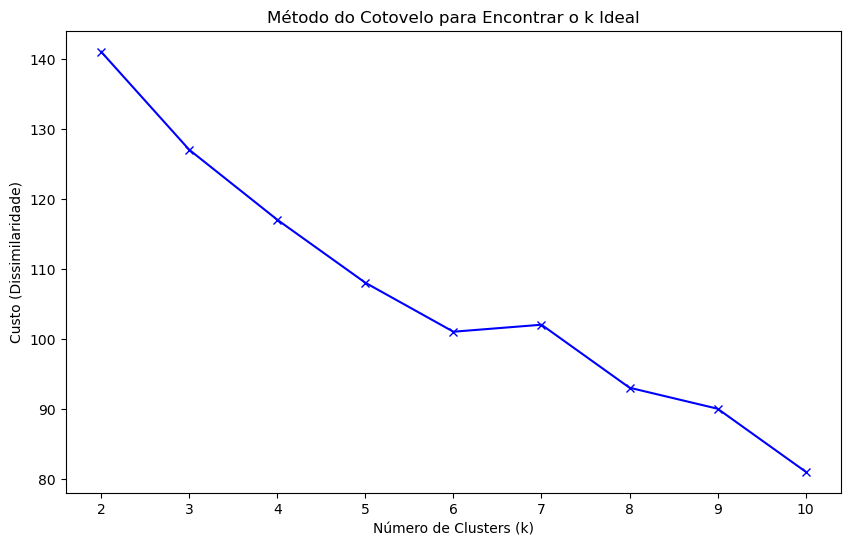

In [5]:
# Apenas executa se o df_cluster foi criado
if 'df_cluster' in locals() and df_cluster is not None:
    custo = []
    K = range(2, 11) # Testaremos de 2 a 10 clusters

    print("Calculando o custo para diferentes valores de k...")

    for num_clusters in list(K):
        # random_state=42 garante que o resultado seja o mesmo toda vez que rodarmos
        kmodes = KModes(n_clusters=num_clusters, init="Huang", n_init=5, random_state=99)
        kmodes.fit_predict(df_cluster)
        custo.append(kmodes.cost_)

    print("Cálculo finalizado.")

    # Plotando o gráfico do cotovelo
    plt.figure(figsize=(10, 6))
    plt.plot(K, custo, 'bx-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Custo (Dissimilaridade)')
    plt.title('Método do Cotovelo para Encontrar o k Ideal')
    plt.show()

In [7]:
# Apenas executa se o df_cluster foi criado
if 'df_cluster' in locals() and df_cluster is not None:
    
    # --- AJUSTE ESTE VALOR COM BASE NO GRÁFICO ACIMA ---
    K_OTIMO = 6
    # ---------------------------------------------------

    print(f"Aplicando o K-Modes com k = {K_OTIMO}...\n")
    
    # Executando o modelo final com o k escolhido
    kmodes_final = KModes(n_clusters=K_OTIMO, init="Huang", n_init=5, random_state=42)
    clusters = kmodes_final.fit_predict(df_cluster)
    
    # Adicionando a coluna de cluster ao nosso DataFrame principal
    df_encoded['cluster'] = clusters
    
    # --- ANÁLISE DOS RESULTADOS ---

    # 1. Verificando o tamanho de cada cluster
    print("--- Tamanho de Cada Cluster ---")
    print(df_encoded['cluster'].value_counts().sort_index())
    
    # 2. Verificando os centros dos clusters (protótipos)
    print("\n--- Perfil Típico de Cada Cluster (Centros) ---")
    print("Lembre-se: 1='A', 2='B', 3='C', ...")
    
    centros = pd.DataFrame(kmodes_final.cluster_centroids_, columns=df_cluster.columns)
    display(centros)

Aplicando o K-Modes com k = 6...

--- Tamanho de Cada Cluster ---
cluster
0     5
1     5
2    11
3     1
4     3
5     9
Name: count, dtype: int64

--- Perfil Típico de Cada Cluster (Centros) ---
Lembre-se: 1='A', 2='B', 3='C', ...


,padrao_sangramento_uterino,volume_fluxo_menstrual,sangramento_pos_menopausa,sangramento_fora_periodo,dificuldade_engravidar,historico_aborto,dor_pelvica,tamoxifeno,terapia_reposição_hormonal_trh,historico_familiar,sangramento_ativo_exame_especular,aumento_volume_uterino_palpacao,localizar_fio_diu,encaminhada_hd
0,2,2,3,3,2,4,2,3,3,3,3,2,2,2
1,3,4,4,1,4,4,2,2,3,3,3,3,3,2
2,4,4,2,2,2,4,3,3,3,3,3,3,3,2
3,2,4,2,2,3,4,1,2,2,2,2,2,2,2
4,2,4,4,1,3,4,3,3,2,2,3,2,3,1
5,3,4,2,2,3,4,3,3,3,3,3,2,3,2


In [11]:
import json

# Cole o JSON que você forneceu.
# Em um cenário real, isso poderia ser carregado de um arquivo .json
json_texto = """
[
    {
        "pergunta": "Qual é o padrão de sangramento da paciente?",
        "nome_coluna": "padrao_sangramento_uterino",
        "alternativas": [
            "Ciclos Regulares",
            "Ciclos Irregulares",
            "Ausência de Menstruação (Amenorreia)",
            "Não informado"
        ]
    },
    {
        "pergunta": "Qual é o volume do fluxo menstrual da paciente?",
        "nome_coluna": "volume_fluxo_menstrual",
        "alternativas": [
            "Normal",
            "Aumentado (troca de absorvente a cada 1-2h)",
            "Diminuído",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente apresenta sangramento Pós-Menopausa?",
        "nome_coluna": "sangramento_pos_menopausa",
        "alternativas": [
            "Sim",
            "Não",
            "Não se aplica",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente apresenta sangramento fora do período menstrual?",
        "nome_coluna": "sangramento_fora_periodo",
        "alternativas": [
            "Sim",
            "Não",
            "Não se aplica",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente apresenta dificuldade para engravidar?",
        "nome_coluna": "dificuldade_engravidar",
        "alternativas": [
            "Sim (tentando há >1 ano)",
            "Sim (tentando há <1 ano)",
            "Não",
            "Não informado"
        ]
    },
    {
        "pergunta": "Qual o histórico de abortos da paciente?",
        "nome_coluna": "historico_aborto",
        "alternativas": [
            "Nenhum",
            "1 aborto",
            "2 ou mais abortos",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente apresenta dor pélvica crônica ou cólicas severas?",
        "nome_coluna": "dor_pelvica",
        "alternativas": [
            "Sim",
            "Não",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente faz uso de Tamoxifeno?",
        "nome_coluna": "tamoxifeno",
        "alternativas": [
            "Sim",
            "Não",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente faz Terapia de Reposição Hormonal (TRH)?",
        "nome_coluna": "terapia_reposição_hormonal_trh",
        "alternativas": [
            "Sim",
            "Não",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente possui histórico familiar?",
        "nome_coluna": "historico_familiar",
        "alternativas": [
            "Sim",
            "Não",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente possui sangramento ativo no Exame Especular?",
        "nome_coluna": "sangramento_ativo_exame_especular",
        "alternativas": [
            "Sim",
            "Não",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente apresenta aumento do volume uterino na palpação?",
        "nome_coluna": "aumento_volume_uterino_palpacao",
        "alternativas": [
            "Sim",
            "Não",
            "Não informado"
        ]
    },
    {
        "pergunta": "É difícil localizar o Fio do Diu na paciente?",
        "nome_coluna": "localizar_fio_diu",
        "alternativas": [
            "Sim",
            "Não",
            "Não informado"
        ]
    },
    {
        "pergunta": "A paciente foi encaminhada ou indicada para a Histeroscopia Diagnóstica (HD)?",
        "nome_coluna": "encaminhada_hd",
        "alternativas": [
            "Sim",
            "Não"
        ]
    }
]
"""

# Carrega o texto JSON para uma estrutura de dados Python
mapeamento_info = json.loads(json_texto)

# 1. Cria um dicionário de mapeamento reverso para fácil acesso
#    Formato: {'nome_da_coluna': ['Alternativa A', 'Alternativa B', ...]}
mapa_reverso = {item['nome_coluna']: item['alternativas'] for item in mapeamento_info}

print("Dicionário de mapeamento reverso criado com sucesso.\n")


# 2. Verifica se o DataFrame de centros existe antes de prosseguir
#    (Ele foi criado na Célula 7 com o nome 'centros')
if 'centros' in locals() and centros is not None:
    # Faz uma cópia para não alterar o original
    centros_humanos = centros.copy()

    # Itera sobre cada coluna do DataFrame de centros
    for coluna in centros_humanos.columns:
        if coluna in mapa_reverso:
            # Pega a lista de alternativas em texto para a coluna atual
            alternativas_texto = mapa_reverso[coluna]
            
            # Usa a função .apply() para substituir cada número pelo texto correspondente
            # Lembre-se que 1='A', 2='B', etc., que correspondem aos índices 0, 1, ...
            centros_humanos[coluna] = centros_humanos[coluna].apply(
                lambda num: alternativas_texto[int(num) - 1]
            )
            
    print("--- Perfis dos Clusters (em formato legível) ---")
    display(centros_humanos)
    centros_humanos.to_csv("../data/processed/clusters_representants.csv")

else:
    print("O DataFrame 'centros' não foi encontrado. "
          "Por favor, execute a célula de aplicação do K-Modes (Célula 7) primeiro.")

Dicionário de mapeamento reverso criado com sucesso.

--- Perfis dos Clusters (em formato legível) ---


,padrao_sangramento_uterino,volume_fluxo_menstrual,sangramento_pos_menopausa,sangramento_fora_periodo,dificuldade_engravidar,historico_aborto,dor_pelvica,tamoxifeno,terapia_reposição_hormonal_trh,historico_familiar,sangramento_ativo_exame_especular,aumento_volume_uterino_palpacao,localizar_fio_diu,encaminhada_hd
0,Ciclos Irregulares,Aumentado (troca de absorvente a cada 1-2h),Não se aplica,Não se aplica,Sim (tentando há <1 ano),Não informado,Não,Não informado,Não informado,Não informado,Não informado,Não,Não,Não
1,Ausência de Menstruação (Amenorreia),Não informado,Não informado,Sim,Não informado,Não informado,Não,Não,Não informado,Não informado,Não informado,Não informado,Não informado,Não
2,Não informado,Não informado,Não,Não,Sim (tentando há <1 ano),Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não
3,Ciclos Irregulares,Não informado,Não,Não,Não,Não informado,Sim,Não,Não,Não,Não,Não,Não,Não
4,Ciclos Irregulares,Não informado,Não informado,Sim,Não,Não informado,Não informado,Não informado,Não,Não,Não informado,Não,Não informado,Sim
5,Ausência de Menstruação (Amenorreia),Não informado,Não,Não,Não,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não,Não informado,Não
